# Introduction to Probability: Coins and Dice

## Objectives 

- Demonstrate basic probability concepts using Python simulations.
- Visualize frequency distributions for outcomes in coin flips and dice rolls.
- Compare outcomes between fair and weighted dice to understand probability bias.
- Educate on the convergence of experimental probabilities to theoretical probabilities with an increasing number of trials.

## Background

This notebook introduces probability theory through practical experiments using coin flips and dice roll simulations. It uses Python's libraries, NumPy and Matplotlib, to demonstrate how theoretical probabilities translate into experimental data. The simulations help illustrate key probability concepts, including the law of large numbers and the behavior of non-uniform probability distributions.

## Datasets Used

The notebook does not use external datasets. Through Python simulations, it generates synthetic data. 

## Flipping coins

In [1]:
import numpy as np
rng = np.random.default_rng()
import pandas as pd

import matplotlib.pyplot as plt

Let's conduct an experiment tossing n coins and calculating the frequencies of Heads and Tails.

`coin_trial` is a function that simulates the toss of a coin. 

Let's assume it returns `True` if the result is Head and `False` if the result is Tail.

In [2]:
def coin_trial():
    ''''
    It simulates the toss of a coin.
    It returns True if Head, else Tail.
    '''
    return (rng.random() > 0.5)

`coin_simulate` simulates the toss of n coins. It counts the number of Heads and Tails, and calculate their frequencies. Is displays 

In [3]:
def coin_simulate(n):
    '''
    It simulates the toss of n coins, and shows the graphical results in each step.
    '''
    # Let's create an array with random results using coin_trail()
    coins = np.array([coin_trial() for i in range(n)])

    # Now, let's calculate the cumulative probability for heads and tails
    # by counting the quantity of running heads
    heads : int = 0
    p_heads = np.ndarray(n)
    p_tails = np.ndarray(n)
    for i in range(n):
        if coins[i]:
            heads += 1
        p_heads[i] = 1.0 * heads / (i + 1)

    # The probability for tails is the complement of what was calculated for heads
    p_tails = [1 - p_heads[i] for i in range(n)]

    # One numpy range will serve as the X axis
    x = np.arange(n)

    # Now let's plot two sets of points (x, p_heads) and (x, p_tails)
    plt.plot(x, p_heads, 'og', label='Head')
    plt.plot(x, p_tails, 'ob', label='Tail')
    plt.legend()
    plt.ylabel('Frequency')
    plt.title('Coins')
    plt.show()
    print('Heads = %2i    Prob(Head) = %.3f' %(heads, heads/n))
    print('Tails = %2i    Prob(Tail) = %.3f' %(n-heads, (n-heads)/n))

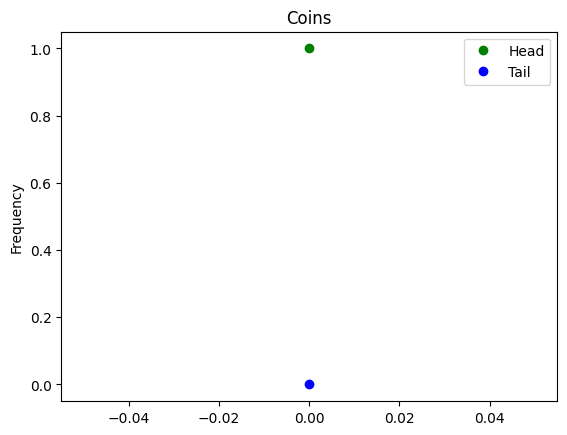

Heads =  1    Prob(Head) = 1.000
Tails =  0    Prob(Tail) = 0.000


In [4]:
# Tossing one coin
coin_simulate(1)

`coin_simulate(1)` toss one coin. Head is represented in green, and Tail in blue.

- If the result is a Head, you see the green dot with a frequency of 1 and the blue dot with a frequency of 0.

- If the result is a Tail, you see the blue dot with a frequency of 1 and the green dot with a frequency of 0.

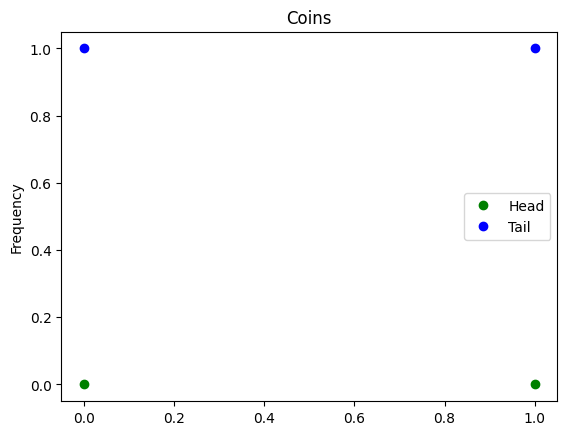

Heads =  0    Prob(Head) = 0.000
Tails =  2    Prob(Tail) = 1.000


In [5]:
# Tossing 2 coins
coin_simulate(2)

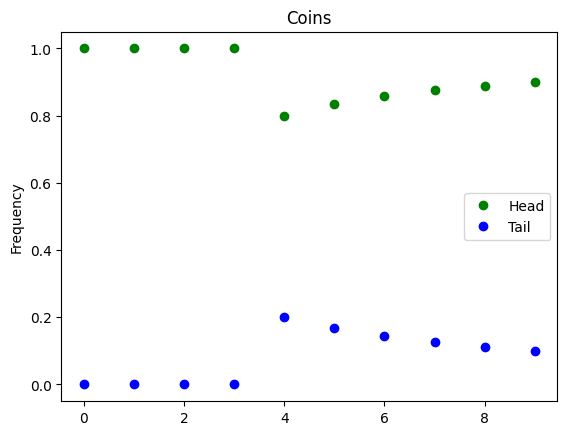

Heads =  9    Prob(Head) = 0.900
Tails =  1    Prob(Tail) = 0.100


In [6]:
# Tossing 10 coins
coin_simulate(10)

`coin_simulate(10)` tosses 10 coins. The frequencies of Heads (`p_heads`) and Tails (`p_tails`) are calculated and graphed in each step.

The last two lines show a summary of the experiment.

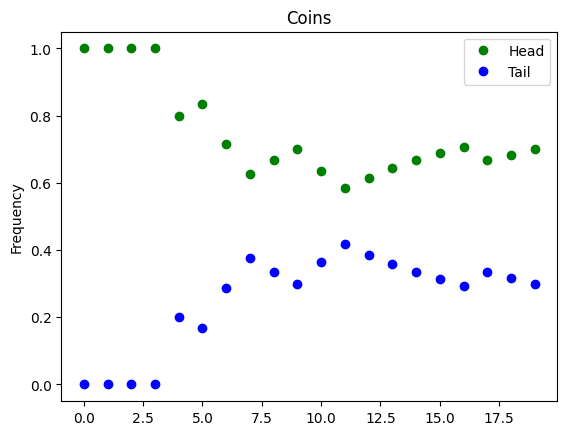

Heads = 14    Prob(Head) = 0.700
Tails =  6    Prob(Tail) = 0.300


In [7]:
# Tossing 20 coins
coin_simulate(20)

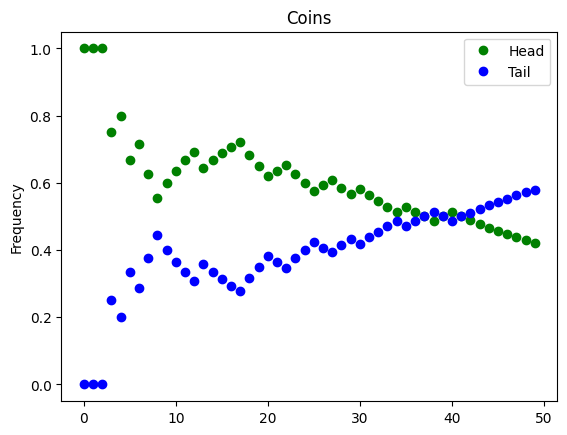

Heads = 21    Prob(Head) = 0.420
Tails = 29    Prob(Tail) = 0.580


In [8]:
# Tossing 50 coins
coin_simulate(50)

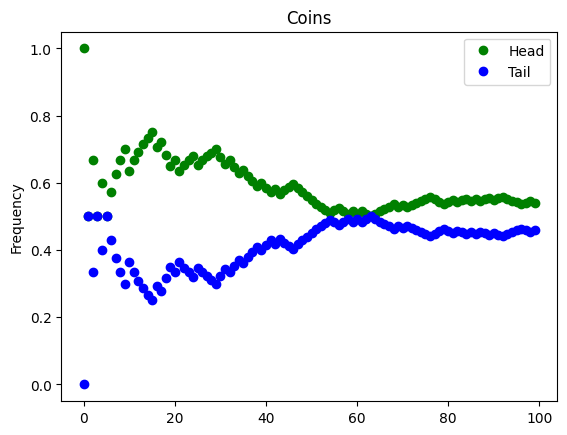

Heads = 54    Prob(Head) = 0.540
Tails = 46    Prob(Tail) = 0.460


In [9]:
# Tossing 100 coins
coin_simulate(100)

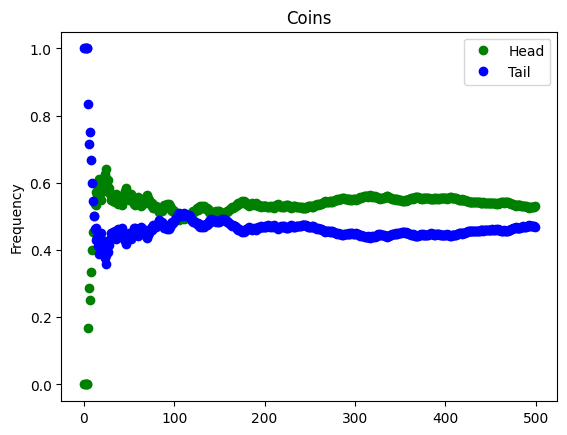

Heads = 265    Prob(Head) = 0.530
Tails = 235    Prob(Tail) = 0.470


In [10]:
# Tossing 500 coins
coin_simulate(500)

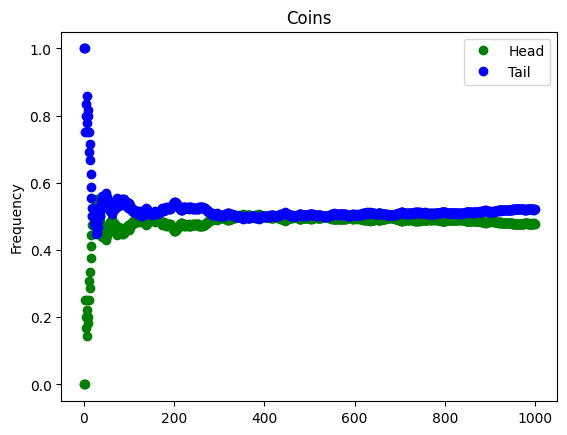

Heads = 479    Prob(Head) = 0.479
Tails = 521    Prob(Tail) = 0.521


In [11]:
# Tossing 1000 coins
coin_simulate(1000)

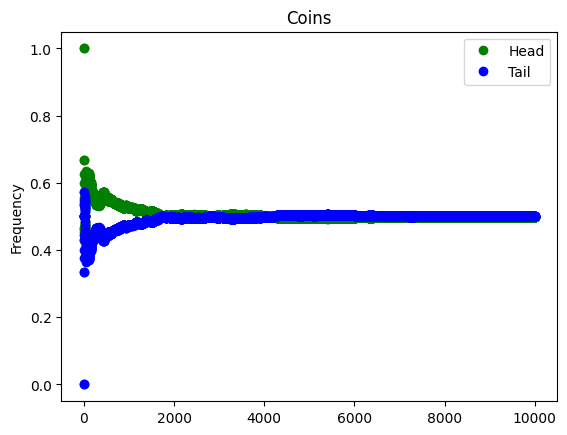

Heads = 4982    Prob(Head) = 0.498
Tails = 5018    Prob(Tail) = 0.502


In [12]:
# Tossing 10000 coins
coin_simulate(10000)

As we can see, the probabilities of Heads and Tails converge to 0.5

## Rolling fair dice

Let's conduct an experiment tossing n dice and calculating the frequencies of the values 1, 2, 3, 4, 5, and 6.

In [13]:
def die_trial(pr = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 1]):
    '''
    It simulates the roll of a die.
    pr parameter represents probabilities of a regular die.
    (You can change it to simulate any weighted die.)
    '''
    rnd = rng.random()
    l = [i for i in range(1,7) if pr[i-1] <= rnd < pr[i]]
    
    return l[0]

In [14]:
def fair_die_simulate(n):
    '''
    It simulates the roll of n dice, and shows the graphical results in each step.
    '''
    cols = ['1','2','3','4','5','6']
    dice = []
    new_die = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0}
    die_color = {'1':'og', '2':'oc', '3':'ob', '4':'ok', '5':'om', '6':'or'}
    fq = pd.DataFrame(columns=cols)
    for i in range(n):
        dice.append(die_trial())
        for key in new_die:
            new_die[key] = dice.count(int(key))/(i+1)        
        fq.loc[i] = new_die    
    x = np.arange(1,n+1)
    for c in cols:
        plt.plot(x,fq[c], die_color[c], label=c)
    plt.legend()
    plt.ylabel('Frequency')
    plt.title('Dice')
    plt.show()
    for c in cols:
        print('N%c = %3i    Prob(N%c) = %.3f' %(c, dice.count(int(c)), c, fq[c][n-1]))


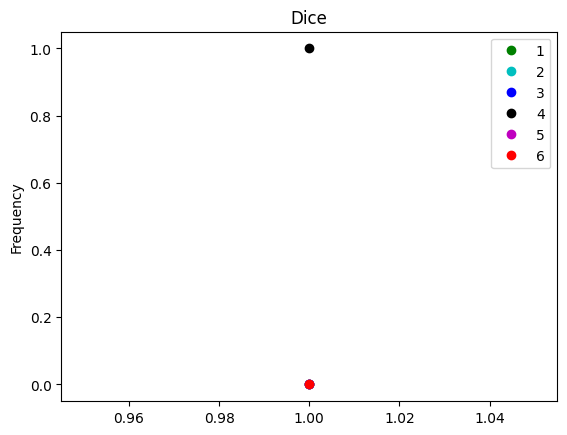

N1 =   0    Prob(N1) = 0.000
N2 =   0    Prob(N2) = 0.000
N3 =   0    Prob(N3) = 0.000
N4 =   1    Prob(N4) = 1.000
N5 =   0    Prob(N5) = 0.000
N6 =   0    Prob(N6) = 0.000


In [15]:
# Rolling one die
fair_die_simulate(1)

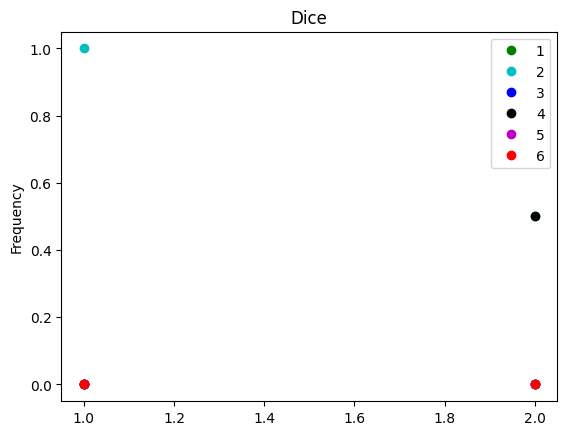

N1 =   0    Prob(N1) = 0.000
N2 =   1    Prob(N2) = 0.500
N3 =   0    Prob(N3) = 0.000
N4 =   1    Prob(N4) = 0.500
N5 =   0    Prob(N5) = 0.000
N6 =   0    Prob(N6) = 0.000


In [16]:
# Rolling two dice
fair_die_simulate(2)

When you roll a die, the probability of the number that appears is 1, the probabilities of the other numbers are 0. 

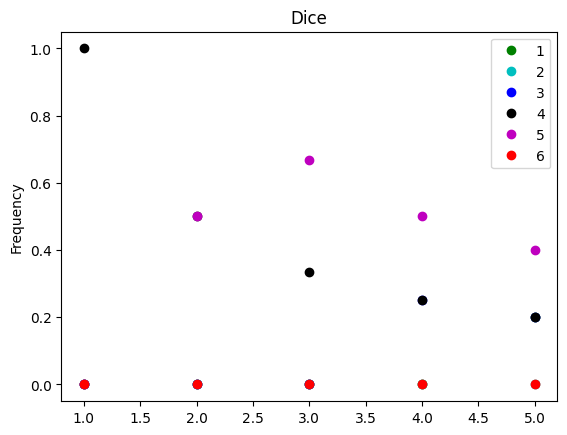

N1 =   1    Prob(N1) = 0.200
N2 =   0    Prob(N2) = 0.000
N3 =   1    Prob(N3) = 0.200
N4 =   1    Prob(N4) = 0.200
N5 =   2    Prob(N5) = 0.400
N6 =   0    Prob(N6) = 0.000


In [17]:
# Rolling 5 dice
fair_die_simulate(5)

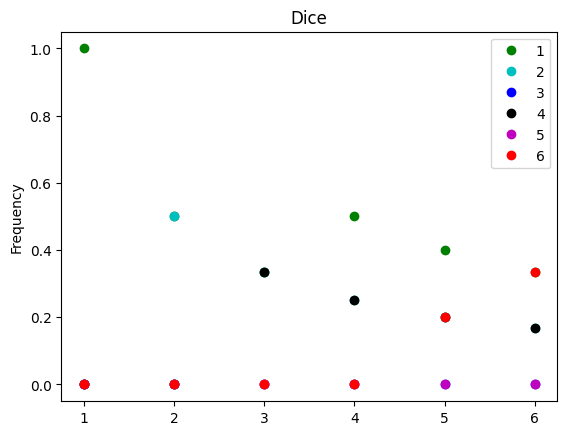

N1 =   2    Prob(N1) = 0.333
N2 =   1    Prob(N2) = 0.167
N3 =   0    Prob(N3) = 0.000
N4 =   1    Prob(N4) = 0.167
N5 =   0    Prob(N5) = 0.000
N6 =   2    Prob(N6) = 0.333


In [18]:
# Rolling 10 fair dice
fair_die_simulate(6)

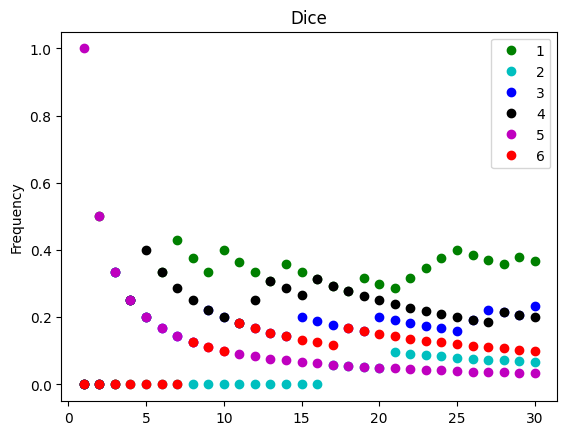

N1 =  11    Prob(N1) = 0.367
N2 =   2    Prob(N2) = 0.067
N3 =   7    Prob(N3) = 0.233
N4 =   6    Prob(N4) = 0.200
N5 =   1    Prob(N5) = 0.033
N6 =   3    Prob(N6) = 0.100


In [19]:
# Rolling 30 fair dice
fair_die_simulate(30)

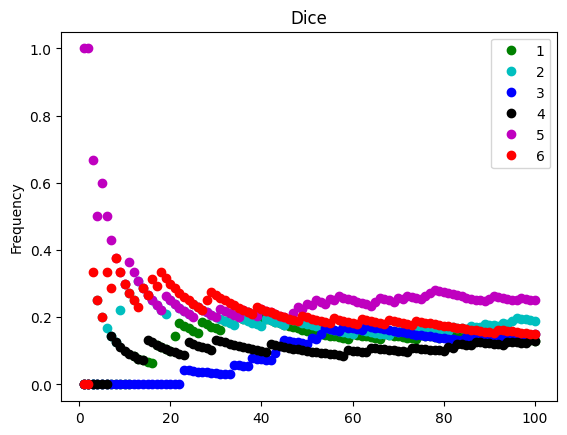

N1 =  13    Prob(N1) = 0.130
N2 =  19    Prob(N2) = 0.190
N3 =  15    Prob(N3) = 0.150
N4 =  13    Prob(N4) = 0.130
N5 =  25    Prob(N5) = 0.250
N6 =  15    Prob(N6) = 0.150


In [20]:
# Rolling 100 fair dice
fair_die_simulate(100)

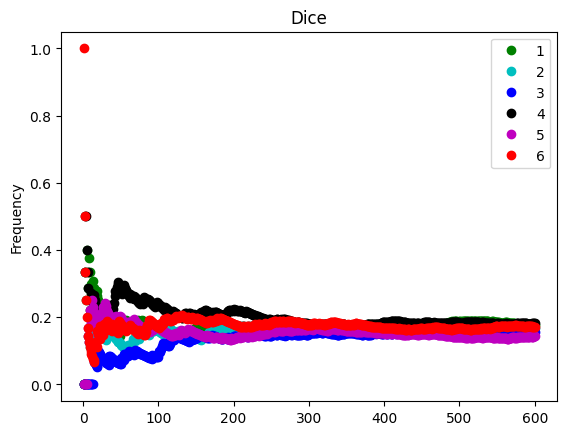

N1 = 106    Prob(N1) = 0.177
N2 = 101    Prob(N2) = 0.168
N3 =  94    Prob(N3) = 0.157
N4 = 110    Prob(N4) = 0.183
N5 =  86    Prob(N5) = 0.143
N6 = 103    Prob(N6) = 0.172


In [21]:
# Rolling 600 fair dice
fair_die_simulate(600)

Notice that the probabilities of the 6 values are near 1/6=0.166.

## Rolling unfair dice

Let's make an experiment with unfair dice. 

The probability to get a 5 will be 1/2. The probability of any other number will be equal to 1/10.

In [22]:
def unfair_dice_simulate(n):
    '''
    It simulates the roll of n weighted dice (pr('5')=1/2),
    and shows the graphical results in each step.
    '''
    cols = ['1','2','3','4','5','6']
    dice = []
    new_die = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0}
    die_color = {'1':'og', '2':'oc', '3':'ob', '4':'ok', '5':'om', '6':'or'}
    fq = pd.DataFrame(columns=cols)
    pr = [0, 1/10, 2/10, 3/10, 4/10, 9/10, 1]
    for i in range(n):
        dice.append(die_trial(pr))
        for key in new_die:
            new_die[key] = dice.count(int(key))/(i+1)        
        fq.loc[i] = new_die
    x = np.arange(1,n+1)
    for c in cols:
        plt.plot(x,fq[c], die_color[c], label=c)
    plt.legend()
    plt.ylabel('Frequency')
    plt.title('Dice')
    plt.show()
    for c in cols:
        print('N%c = %3i    Prob(N%c) = %.3f' %(c, dice.count(int(c)), c, fq[c][n-1]))


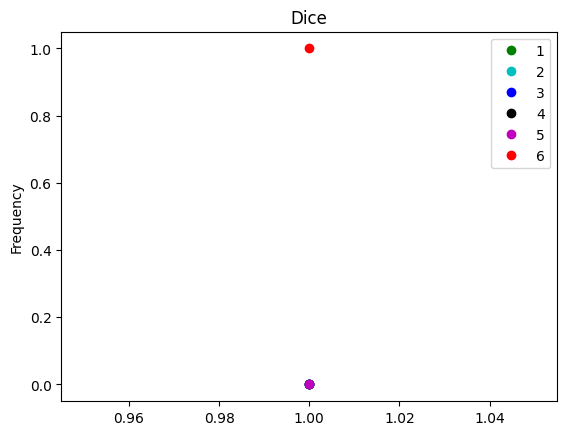

N1 =   0    Prob(N1) = 0.000
N2 =   0    Prob(N2) = 0.000
N3 =   0    Prob(N3) = 0.000
N4 =   0    Prob(N4) = 0.000
N5 =   0    Prob(N5) = 0.000
N6 =   1    Prob(N6) = 1.000


In [23]:
# Rolling one unfair die
unfair_dice_simulate(1)

The graph above represents the result of rolling a weighted die. The number we got has a probability of 1, and the others 0.

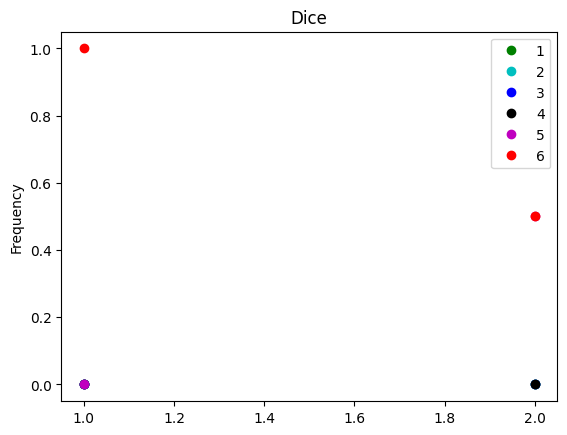

N1 =   0    Prob(N1) = 0.000
N2 =   0    Prob(N2) = 0.000
N3 =   0    Prob(N3) = 0.000
N4 =   0    Prob(N4) = 0.000
N5 =   1    Prob(N5) = 0.500
N6 =   1    Prob(N6) = 0.500


In [24]:
# Rolling two unfair dice
unfair_dice_simulate(2)

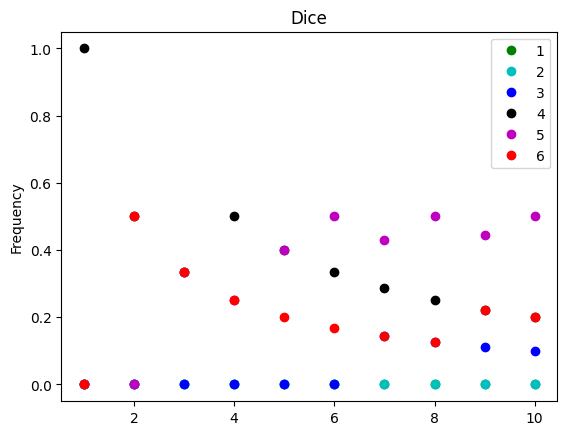

N1 =   0    Prob(N1) = 0.000
N2 =   0    Prob(N2) = 0.000
N3 =   1    Prob(N3) = 0.100
N4 =   2    Prob(N4) = 0.200
N5 =   5    Prob(N5) = 0.500
N6 =   2    Prob(N6) = 0.200


In [25]:
# Rolling ten unfair dice
unfair_dice_simulate(10)

The graph above shows the result of rolling two dice. Most of probabilities are still 0.

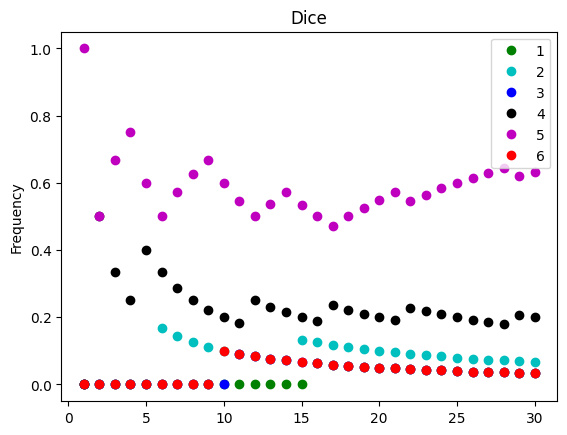

N1 =   1    Prob(N1) = 0.033
N2 =   2    Prob(N2) = 0.067
N3 =   1    Prob(N3) = 0.033
N4 =   6    Prob(N4) = 0.200
N5 =  19    Prob(N5) = 0.633
N6 =   1    Prob(N6) = 0.033


In [26]:
# Rolling 30 unfair dice
unfair_dice_simulate(30)

Now you can see that the probability of 5 is higher than the others.

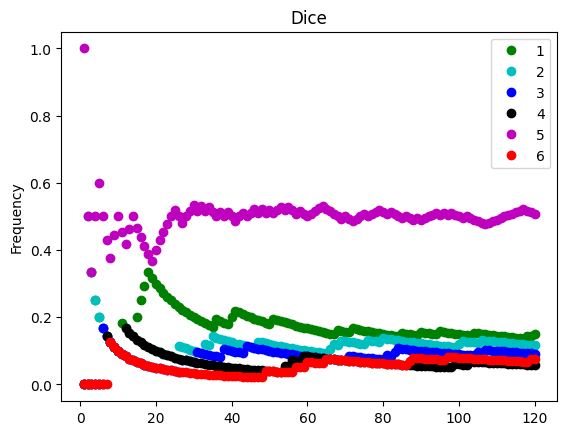

N1 =  18    Prob(N1) = 0.150
N2 =  14    Prob(N2) = 0.117
N3 =  11    Prob(N3) = 0.092
N4 =   7    Prob(N4) = 0.058
N5 =  61    Prob(N5) = 0.508
N6 =   9    Prob(N6) = 0.075


In [27]:
# Rolling 120 unfair dice
unfair_dice_simulate(120)

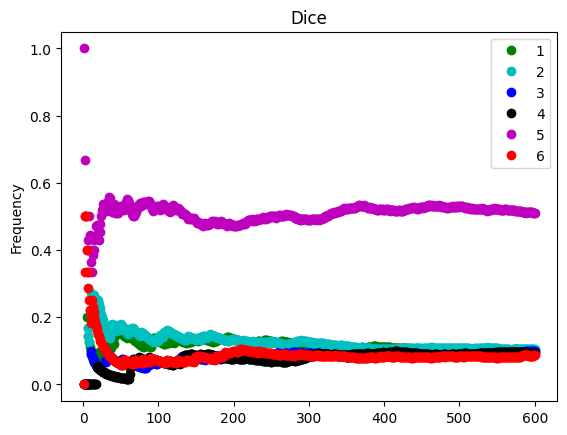

N1 =  62    Prob(N1) = 0.103
N2 =  64    Prob(N2) = 0.107
N3 =  60    Prob(N3) = 0.100
N4 =  56    Prob(N4) = 0.093
N5 = 306    Prob(N5) = 0.510
N6 =  52    Prob(N6) = 0.087


In [28]:
# Rolling 600 unfair dice
unfair_dice_simulate(600)

Notice that after 600 iterations, the probability of the number 5 is close to 0.5; all others have probabilities near 1/10 = 0.1.

## Conclusions

Key Takeaways:
- The simulations confirm that experimental probabilities of outcomes from coin flips and dice rolls increasingly align with theoretical predictions as the number of trials grows, demonstrating the law of large numbers.
- Using biased dice shows the effects of non-uniform probability distributions, providing a clear visual and quantitative understanding of how bias impacts results.
- The notebook's graphic representations illustrate the convergence of experimental probabilities towards theoretical probabilities, making the concept of the law of large numbers easily understandable through visual means.

## References

- Unpingco, J. (2019) Python for Probability, Statistics, and Machine Learning, USA: Springer, chapter 2